In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
# Download Vader lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yetimeshet.tadesse\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')



In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

In [5]:
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


Sentiment Category Distribution:
sentiment_category
Neutral     553725
Positive    326397
Negative    168453
Name: count, dtype: int64


C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_18120\1069414367.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])


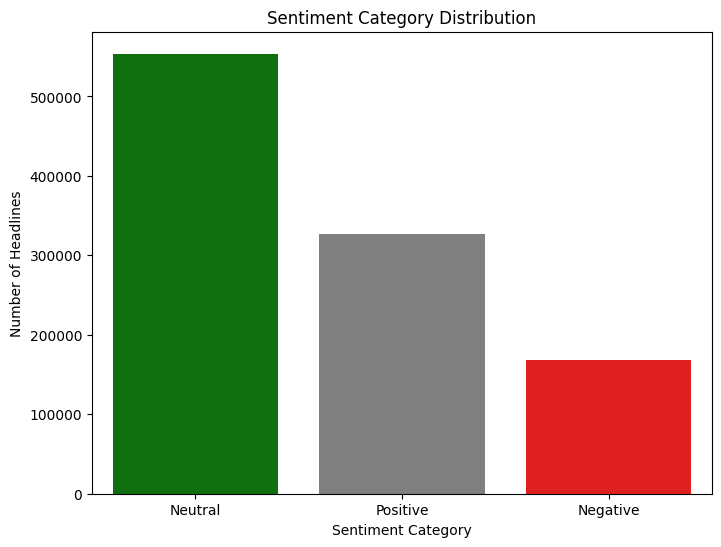

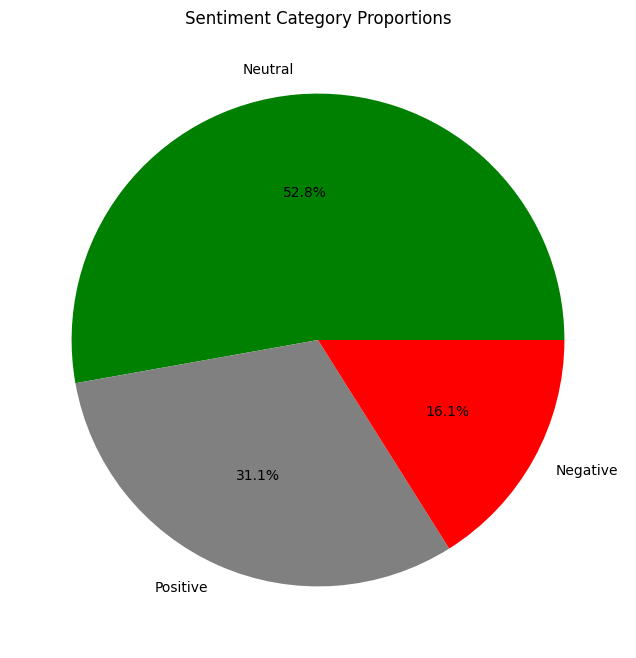

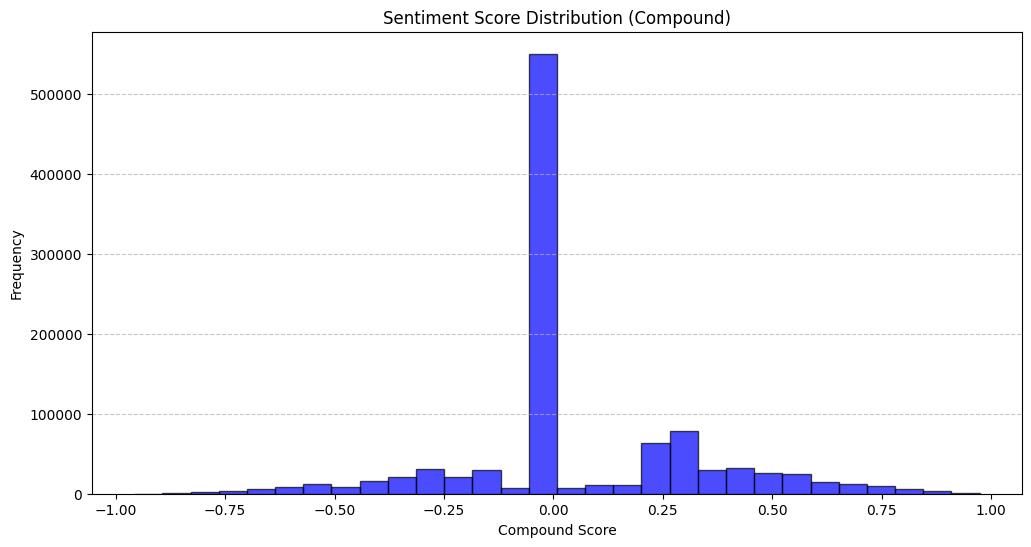

C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_18120\1069414367.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_category', y='sentiment_score', data=df, order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])


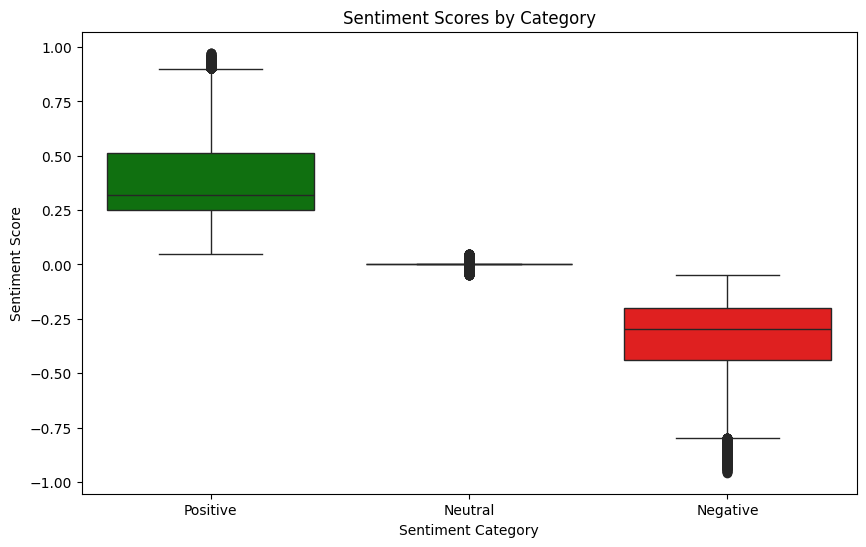

C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_18120\1069414367.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_category', y='sentiment_score', data=df, order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])


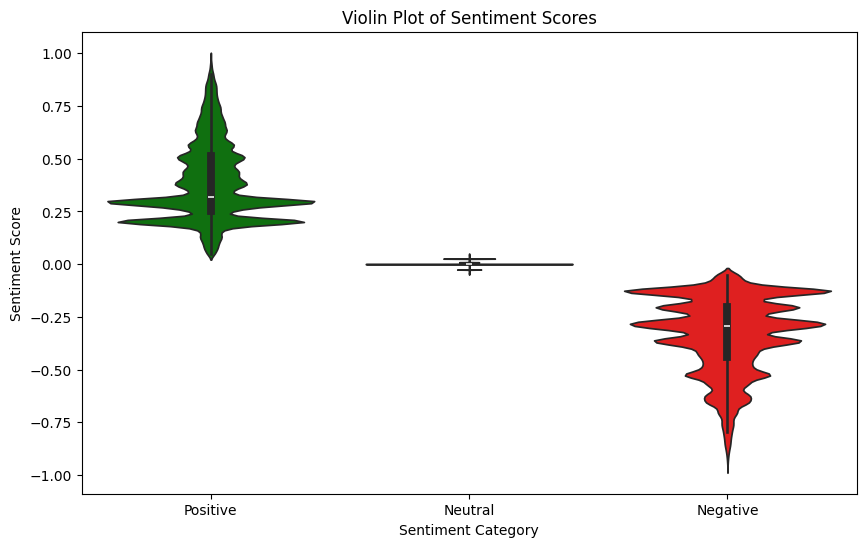


Sample Results:
                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   
5  CFRA Maintains Hold on Agilent Technologies, L...           -0.128   
6  UBS Maintains Neutral on Agilent Technologies,...            0.000   
7  Agilent Technologies shares are trading higher...            0.296   
8  Wells Fargo Maintains Overweight on Agilent Te...           -0.128   
9         10 Biggest Price Target Changes For Friday            0.000   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  
5           Negative  
6            Neutr

In [6]:
# Step 3: Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Step 4: Calculate sentiment score (compound) using VADER
def vader_sentiment(text):
    sentiment = sia.polarity_scores(str(text))
    return sentiment['compound']

df['sentiment_score'] = df['headline'].apply(vader_sentiment)

# Step 5: Categorize sentiment based on compound score
def categorize_sentiment_vader(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment_vader)

# Step 6: Display Sentiment Category Distribution
sentiment_counts = df['sentiment_category'].value_counts()
print("Sentiment Category Distribution:")
print(sentiment_counts)

# Step 7: Visualization

# 1. Bar Chart: Sentiment Category Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.show()

# 2. Pie Chart: Sentiment Category Proportions
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Category Proportions')
plt.show()

# 3. Histogram: Sentiment Score Distribution
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment_score'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Score Distribution (Compound)')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Box Plot: Sentiment Scores by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='sentiment_score', data=df, order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])
plt.title('Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

# 5. Violin Plot: Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_category', y='sentiment_score', data=df, order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])
plt.title('Violin Plot of Sentiment Scores')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

# Step 8: Print a Sample of the Results
print("\nSample Results:")
print(df[['headline', 'sentiment_score', 'sentiment_category']].head(10))

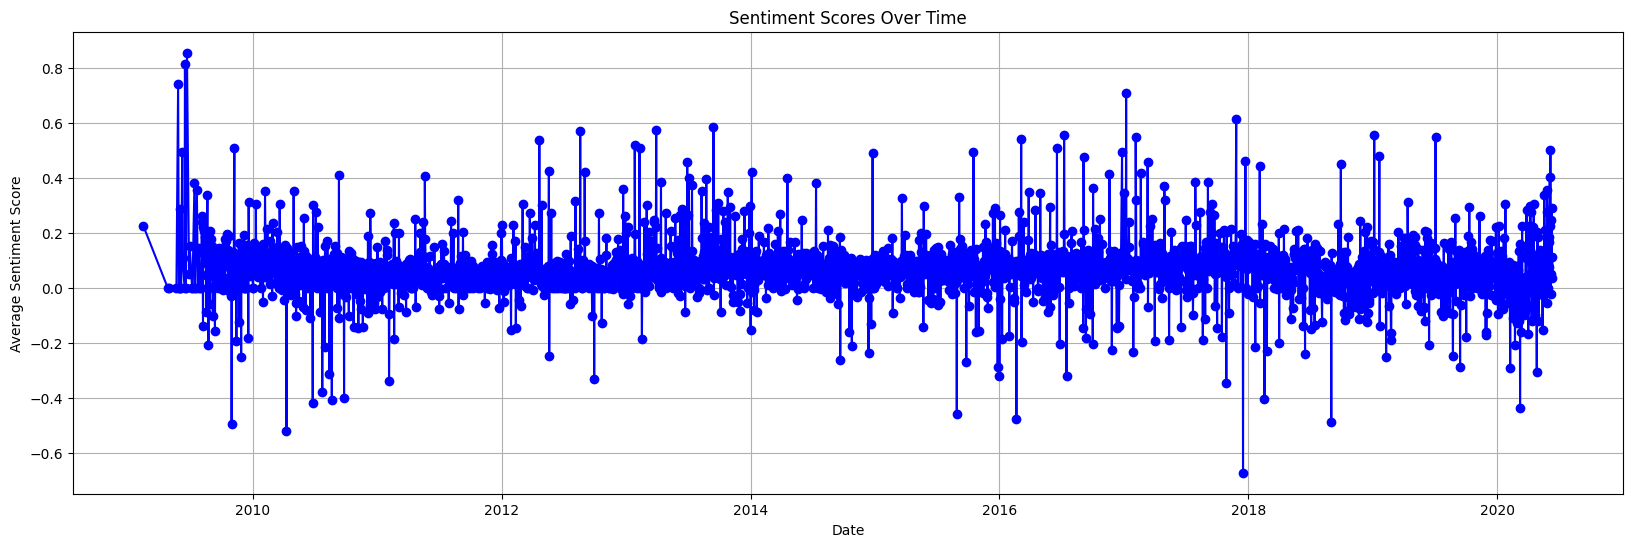

In [44]:
# Ensure 'date' column exists and is parsed correctly
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Group by date and calculate average sentiment
time_series = df.groupby(df['date'].dt.date)['sentiment_score'].mean()

# Plot time-series of sentiment scores
plt.figure(figsize=(20, 6))
time_series.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.show()

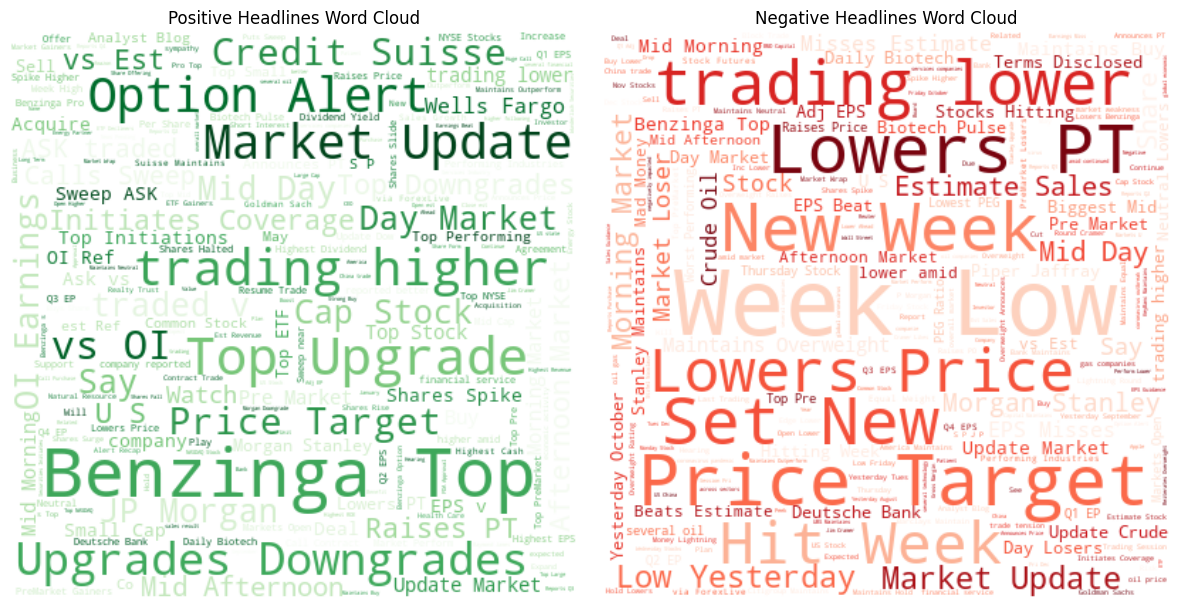

In [45]:
from wordcloud import WordCloud

# Filter positive and negative headlines
positive_text = ' '.join(df[df['sentiment_category'] == 'Positive']['headline'].dropna())
negative_text = ' '.join(df[df['sentiment_category'] == 'Negative']['headline'].dropna())

# Generate Word Clouds
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Headlines Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Headlines Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

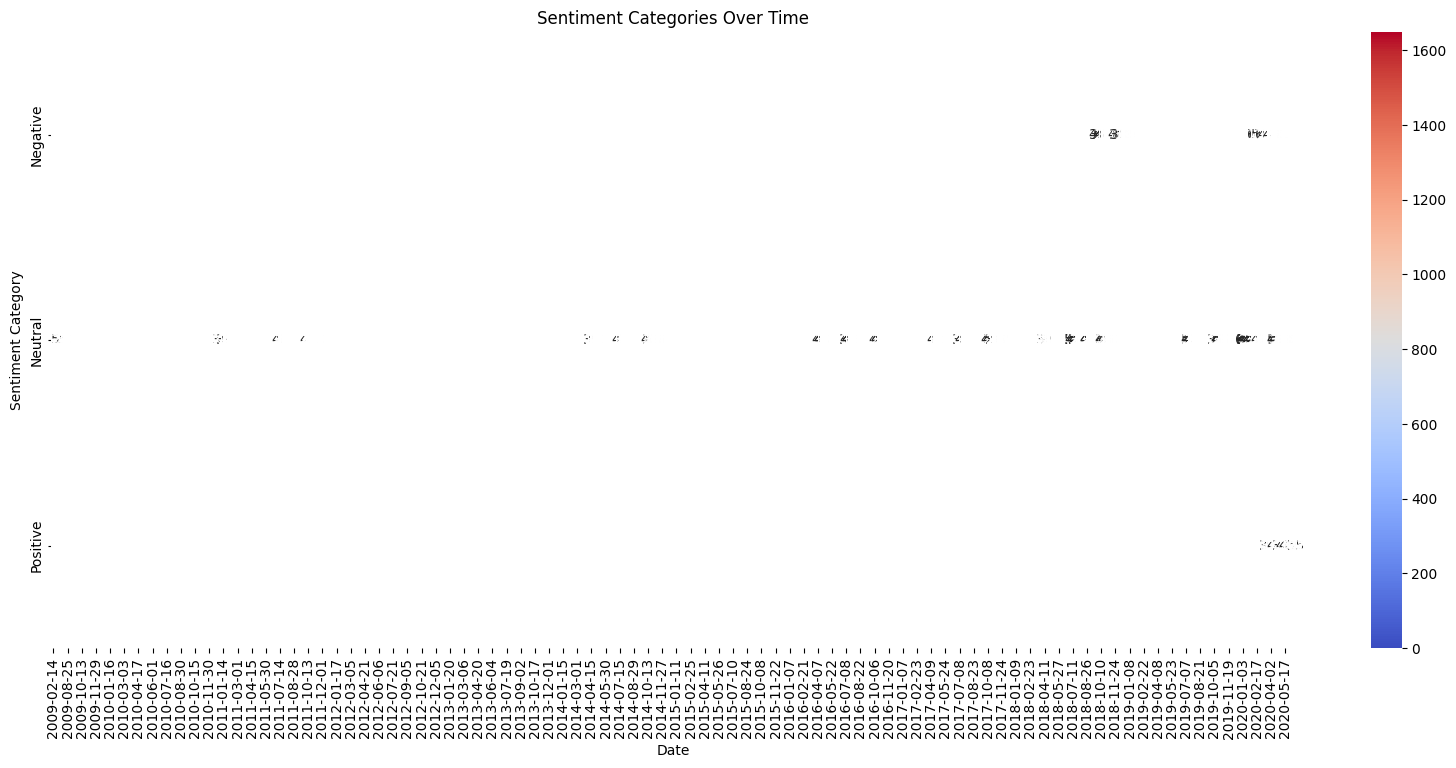

In [47]:
import seaborn as sns

# Ensure 'date' column is parsed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group data by date and sentiment category
heatmap_data = df.groupby([df['date'].dt.date, 'sentiment_category']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data.T, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Sentiment Categories Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Category')
plt.show()

#### Density Plot of Sentiment Scores
###### A density plot shows the probability distribution of sentiment scores for the dataset.

C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_6036\1753166103.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sentiment_score'], shade=True, color='blue')


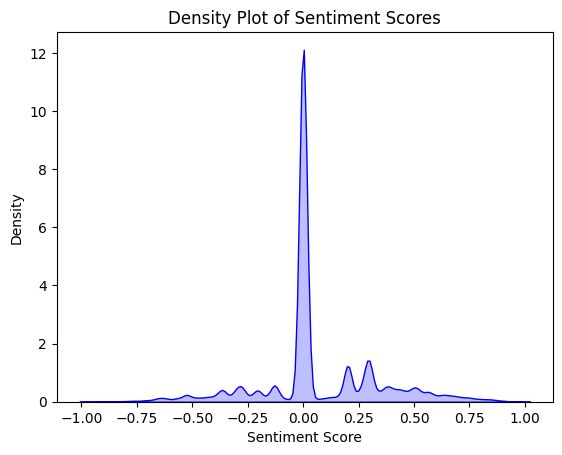

In [48]:
sns.kdeplot(df['sentiment_score'], shade=True, color='blue')
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()